In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Load the csv file
df = pd.read_csv('board2.csv')
df

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


In [2]:
#Verification of columns
print(df.columns)

Index(['Name', 'Gender', 'Track', 'Hometown', 'Math', 'Electronics', 'GEAS',
       'Communication'],
      dtype='object')


In [3]:
#Visayas as constant with Math < 70
Vis = df[(df['Math'] < 70)&
                (df['Hometown'] == 'Visayas')].reset_index(drop=True)
Vis = Vis[['Name', 'Gender', 'Track', 'Math']]
Vis

,Name,Gender,Track,Math
0,S4,Male,Instrumentation,65
1,S11,Female,Communication,48
2,S22,Female,Communication,64


In [7]:
Instru = df[(df['Track'] == 'Instrumentation') & 
               (df['Hometown'] == 'Luzon') & 
               (df['Electronics'] > 70)][['Name', 'GEAS', 'Electronics']].reset_index(drop=True)
Instru

,Name,GEAS,Electronics
0,S1,75,89
1,S8,64,81
2,S30,57,81


In [21]:
#List of score columns to calculate the average from
score_columns = ['Math', 'Electronics', 'GEAS']

#Computing the average score across the specified columns for each student
df['Average'] = df[score_columns].mean(axis=1)

#Picking only the needed columns
Mindy = mindy_df[['Name', 'Track', 'Electronics', 'Average']].reset_index(drop=True)
Mindy

#List of score columns to calculate the average from
score_columns = ['Math', 'Electronics', 'GEAS']  # Adjust based on your dataset

#Computing the average score across the specified columns for each student
df['Average'] = df[score_columns].mean(axis=1)

#Picking only the needed columns
mindy_df = df[(df['Average'] >= 55) & (df['Hometown'] == 'Mindanao')]

# Select only the relevant columns: Name, Track, Electronics, and Average
mindy_df = mindy_df[['Name', 'Track', 'Electronics', 'Average']]

#Print the resulting DataFrame
mindy_df

,Name,Track,Electronics,Average
1,S2,Communication,75,72.333333
2,S3,Instrumentation,74,78.000000
9,S10,Microelectronics,84,75.000000
16,S17,Microelectronics,79,79.000000
19,S20,Communication,60,60.333333
28,S29,Instrumentation,48,64.000000


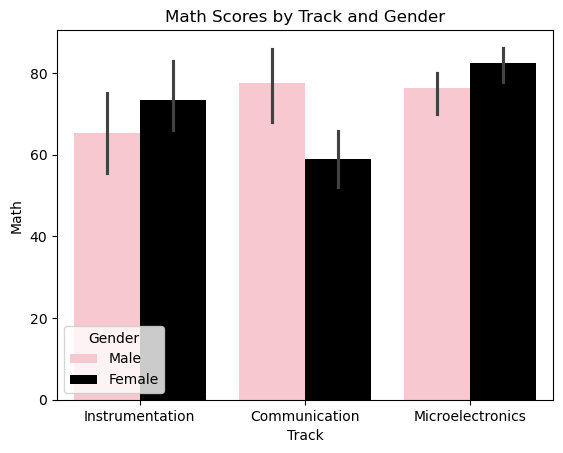

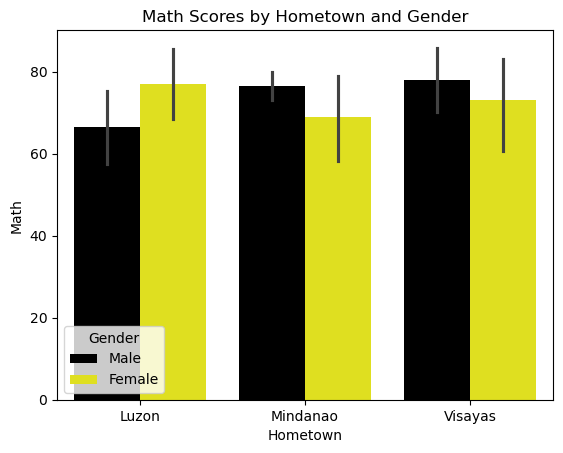

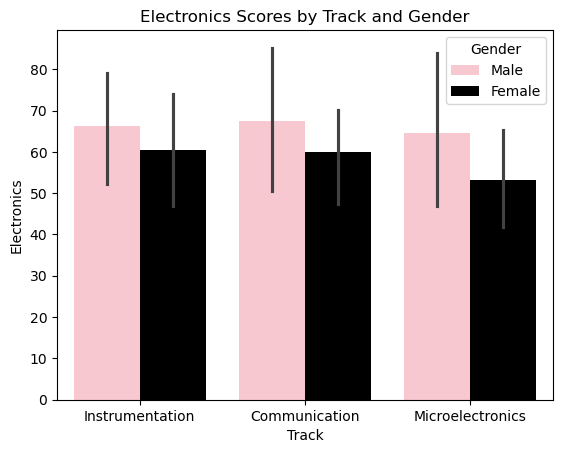

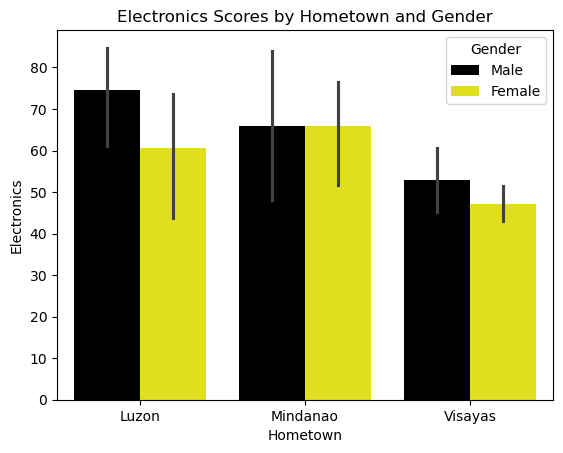

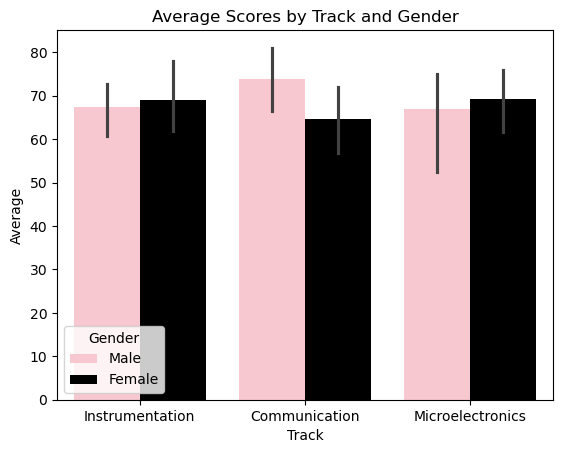

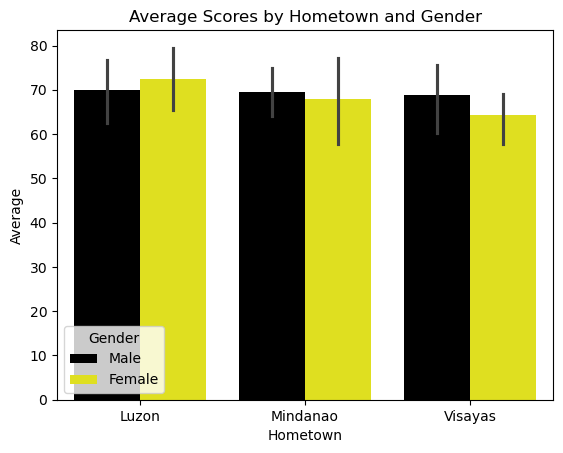

In [95]:
#Calculate the average score across relevant columns
df['Average'] = df[['Math', 'Electronics', 'GEAS']].mean(axis=1)

def plot_all_scores(df, columns, hue='Gender'):
    for col in columns:
        sns.barplot(x='Track', y=col, hue=hue, data=df, palette=['pink', 'black'])
        plt.title(f'{col} Scores by Track and {hue}')
        plt.show()

        sns.barplot(x='Hometown', y=col, hue=hue, data=df, palette=['black','yellow'])
        plt.title(f'{col} Scores by Hometown and {hue}')
        plt.show()

#List of columns to plot
score_columns = ['Math', 'Electronics', 'Average']

#Generating the plots
plot_all_scores(df, score_columns)